# RESUME SCREENING USING ML AND NLP
Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.Large companies do not have enough time to open each Resume, so they use machine learning algorithms for the Resume Screening task. This task of selecting the best talent among many others is known as Resume Screening.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv(r'C:\Users\ATR\Desktop\dsprojects\dataset\UpdatedResumeDataSet.csv')
df.sample(n=10)

Category                                             Resume
948             Testing  â¢ Good logical and analytical skills â¢ Pos...
700                 PMO  CORE COMPETENCIES â¢ Maintain processes to en...
856          Blockchain  SKILLS Bitcoin, Ethereum Solidity Hyperledger,...
232               Sales  KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...
601     DevOps Engineer  CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...
251               Sales  SKILLS 1. MS-Office 2. Good Communication skil...
263               Sales  IT Skills: MS Office. Photoshop. SQL Server.Ed...
799       ETL Developer  Technical Summary â¢ Knowledge of Informatica...
541  Operations Manager  IT SKILLS â¢ Well versed with MS Office and I...
688                 PMO  CORE COMPETENCIES â¢ Maintain processes to en...

# EDA

In [17]:
df.shape

(962, 2)

In [15]:
job_cats=df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='Category'>

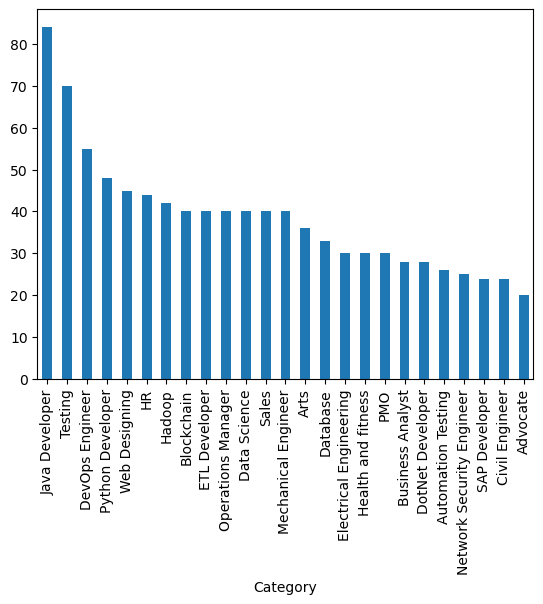

In [26]:
df['Category'].value_counts().plot.bar()

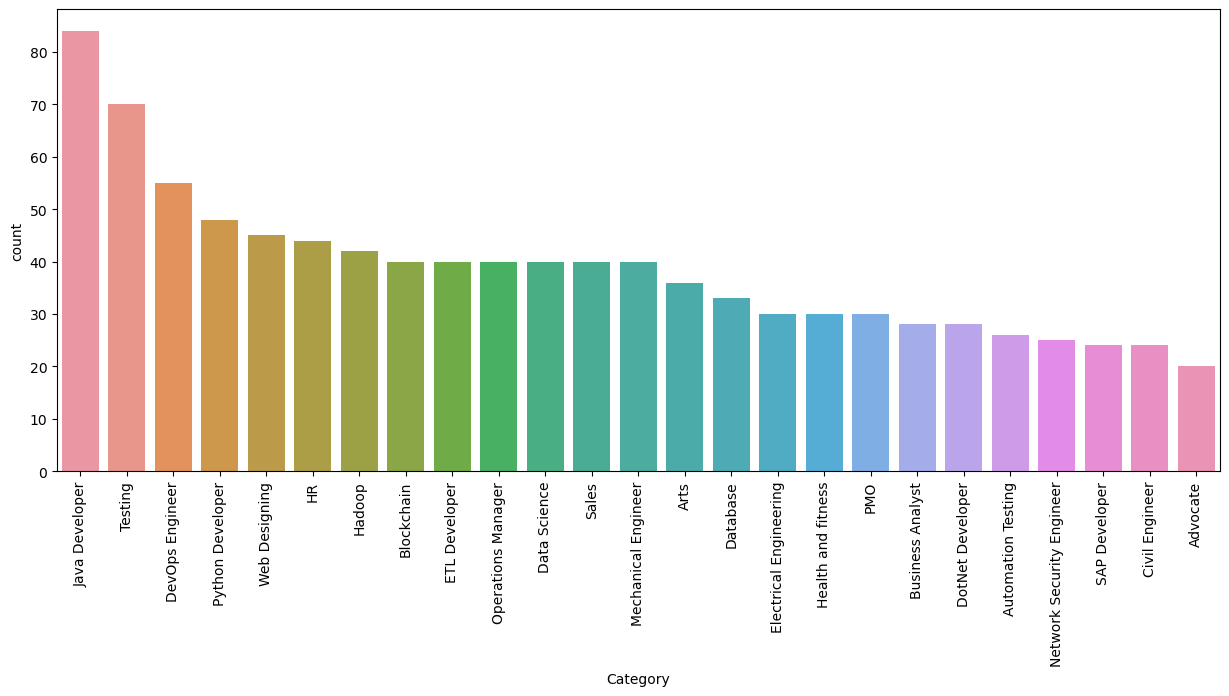

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(x='Category',data=df,order= df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

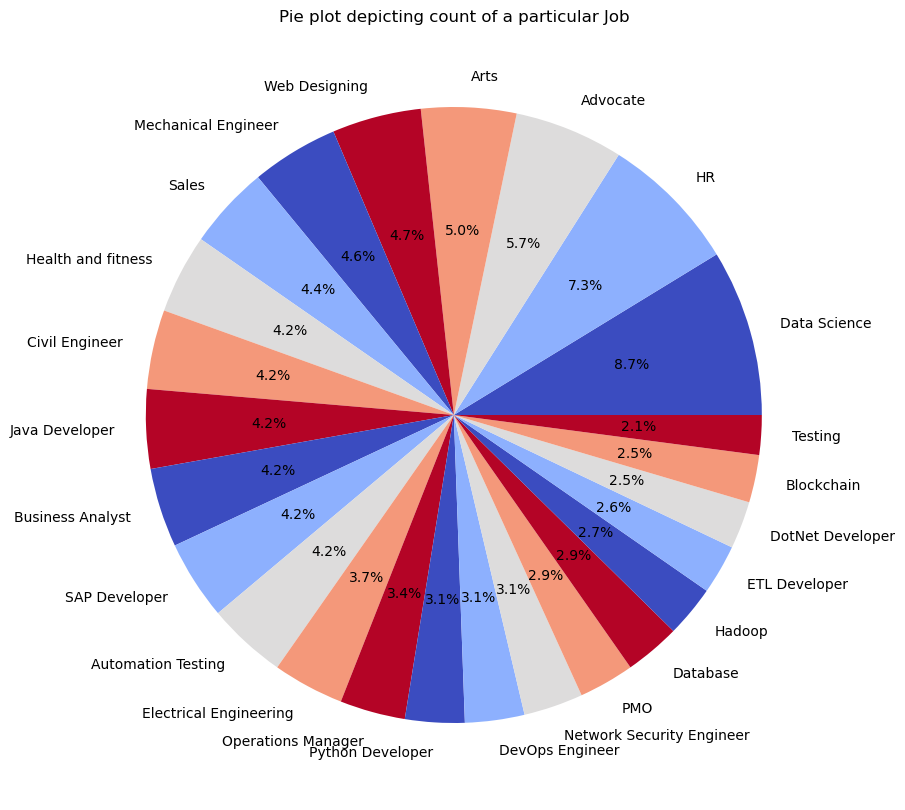

In [50]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',
        shadow=False,colors=plt.cm.coolwarm(np.linspace(0,1,5 )))

plt.title('Pie plot depicting count of a particular Job')
plt.show()

In [194]:
df['Category'][200]

'Mechanical Engineer'

In [195]:
df['Resume'][200]

"Education Details \r\nMay 1999 to September 2002 Diploma Mechanical Engg Mumbai, Maharashtra Institute of Mechanical Engg\r\nMay 1998 to May 1999 Diploma Mechanical Engg. Services  ITES\r\nMay 1993 to May 1995   Mumbai, Maharashtra Industrial Training Institute\r\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant \r\n\r\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant - Mechanical Engineering\r\nSkill Details \r\nMicrosoft Office -Word ,Excel,Auto cad,Micro station J ERP 3d Modeling software- Exprience - 120 monthsCompany Details \r\ncompany - Mechanical Engineering\r\ndescription - Role & Responsibilities: - Application Engineering / Pre Sales & Inside Sales â\x80¢ Provide applications support to inside sales personnel and outside sales channels, Provide product selection and materials of construction technical recommendations.\r\nâ\x80¢ Participate in the necessary training activities to establish technical competency & also Participate in

# Data Cleaning

In [5]:
import re

def CleanResume(text):

     #Remove URLs
    cleaned_text = re.sub('http\S+\s*', ' ', text)
    # Remove RT and cc
    cleaned_text = re.sub('RT|cc', ' ', cleaned_text)
    # Remove hashtags
    cleaned_text = re.sub('#\S+', '', cleaned_text)
    # Remove mentions
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    # Remove punctuations
    cleaned_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)
    # Remove non-ASCII characters
    cleaned_text = re.sub(r'[^\x00-\x7f]', r' ', cleaned_text)
    # Replace multiple spaces with a single space
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    # Remove leading and trailing whitespaces
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [33]:
df_new=df

In [34]:

df_new['Resume']=df_new['Resume'].apply(lambda x:CleanResume(x))


df_new


Category                                             Resume
0    Data Science  Skills Programming Languages Python pandas num...
1    Data Science  Education Details May 2013 to May 2017 B E UIT...
2    Data Science  Areas of Interest Deep Learning Control System...
3    Data Science  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Data Science  Education Details MCA YMCAUST Faridabad Haryan...
..            ...                                                ...
957       Testing  Computer Skills Proficient in MS office Word B...
958       Testing  Willingness to a ept the challenges Positive t...
959       Testing  PERSONAL SKILLS Quick learner Eagerness to lea...
960       Testing  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961       Testing  Skill Set OS Windows XP 7 8 8 1 10 Database MY...

[962 rows x 2 columns]

# Data Pre-processing
#Words into categorical values

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
le.fit(df_new['Category'])
df_new['Category']=le.transform(df_new['Category'])

In [38]:
df_new

Category                                             Resume
0           6  Skills Programming Languages Python pandas num...
1           6  Education Details May 2013 to May 2017 B E UIT...
2           6  Areas of Interest Deep Learning Control System...
3           6  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4           6  Education Details MCA YMCAUST Faridabad Haryan...
..        ...                                                ...
957        23  Computer Skills Proficient in MS office Word B...
958        23  Willingness to a ept the challenges Positive t...
959        23  PERSONAL SKILLS Quick learner Eagerness to lea...
960        23  COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961        23  Skill Set OS Windows XP 7 8 8 1 10 Database MY...

[962 rows x 2 columns]

In [45]:
df_new.Category.unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

Here we use tfidf vectorizer for word vectorization.In TfidfVectorizer we consider overall document weightage of a word. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df_new['Resume'])
requiredText=tfidf.transform(df_new['Resume'])



In [12]:
from sklearn.model_selection import train_test_split
x=requiredText
y=df_new['Category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape,x_test.shape

((769, 7351), (193, 7351))

In [14]:
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model_name=[]
acuracy_val=[]
def train_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('y prediction :\n',y_pred)
    acc=accuracy_score(y_test,y_pred)
    print('Accuracy score :',acc)
    
    model_name.append(model)
    acuracy_val.append(acc)
    accuracy_dict= dict.fromkeys( model_name, acuracy_val)
    #accuracy_dict={[name for name in model_name] : [a for a in acuracy_val]}
    #accuracy_dict
    print('========================================================')
    print("Training Accuracy   :", (model.score(x_train, y_train)*100).round(2) ,"%")
    print("Validation Accuracy :", (model.score(x_test, y_test)*100).round(2) ,"%")
    print('==========================================================')
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
        
        
    

# Use different machine learning classification algorithms to train the model

In [15]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier()
train_model(knn)

y prediction :
 [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy score : 0.9844559585492227
Training Accuracy   : 98.57 %
Validation Accuracy : 98.45 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
     

We can use the OneVsRestClassifier with any of the sklearn models to do multilabel classification for better performance.

In [16]:
#KNeighborsClassifier with OVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
knc=OneVsRestClassifier(KNeighborsClassifier())
train_model(knc)



y prediction :
 [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy score : 0.9844559585492227
Training Accuracy   : 98.57 %
Validation Accuracy : 98.45 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
     

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=4,criterion='entropy')
train_model(rfc)

y prediction :
 [15 15 15 13 15 17 16  2 15 14 13 12 16 23 20 22  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 23 23  7 12 24  8 18  6  8 19 24 23 15  1
 15  4 15 22 11 22 15 13  1 19 23 12 22 22 15 24 21 18 12 15 15 15 10  8
  9 15 17 21 15 17 16 15 15 11 23  8 20  3 19  8 15  2  9 10  2 23 20 20
 23 15 18 12  7 16  8 14 18  3 15 19 15 14 15 18  8  2 21 18 23 10 23 23
 23 15 15  3 23  3  7 12 19  8 20 23  3 15 15 19  1 23 15  5 20 15 15  7
  7  8 15 18  1 15 13 20  7  4 18 11 23 15 23 12 15 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 15  7 16 18 15  3 18  8 23 23 20  6  6  7
 23]
Accuracy score : 0.8341968911917098
Training Accuracy   : 88.17 %
Validation Accuracy : 83.42 %
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
     

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
train_model(gbc)

y prediction :
 [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20  8  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]
Accuracy score : 1.0
Training Accuracy   : 100.0 %
Validation Accuracy : 100.0 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1

In [19]:
from sklearn.svm import SVC
svc=SVC()
train_model(svc)

y prediction :
 [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 15  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]
Accuracy score : 0.9948186528497409
Training Accuracy   : 100.0 %
Validation Accuracy : 99.48 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
     

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
train_model(lr)

y prediction :
 [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]
Accuracy score : 0.9948186528497409
Training Accuracy   : 99.74 %
Validation Accuracy : 99.48 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
     

# Testing the model

In [21]:
def new_inputs(resumes):
    cleaned_resumes = resumes.apply(lambda x:CleanResume(x))
    transformed_resumes =tfidf.transform(cleaned_resumes)
    return transformed_resumes
     

In [46]:
category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }
def cat(prediction_id):

    category_name = category_mapping.get(prediction_id, "Unknown")
    print("Predicted Category:", category_name)

### Giving x as a sample resume

In [63]:
#Using OneVsRestClassifier(KNeighborsClassifier())
x="""IC Test development
Yield enhancement and Test time reduction
Data collection and data analysis
IC failure analysis and debug
Test/HW debug
Procure and maintain necessary test equipment within an agreed budget
Assist the Head of Compliance with performing internal audits
Ensure that Test and Validation Plans are agreed upfront and incorporated into Project Plans and product engineering development activities"""
new_df = pd.Series(x)
pred= knc.predict(new_inputs(new_df))

prediction_id=pred[0]
cat(prediction_id)

Predicted Category: Automation Testing


In [48]:
#Logistic Regression
x = "Languages: Python, C , SQL, Prolog Development: React.js, CSS, HTML Databases: MySQL, MongoDB Data Science: Tableau,PCA, Pandas, NumPy, Matplotlib,Inferential Statistics, Linear algebra Machine Learning: Scikit-Learn"
new_df = pd.Series(x)
pred= lr.predict(new_inputs(new_df))

prediction_id=pred[0]
cat(prediction_id)

Predicted Category: Data Science


# Find Most repeated words 

In [49]:
#!pip install wordcloud 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ATR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


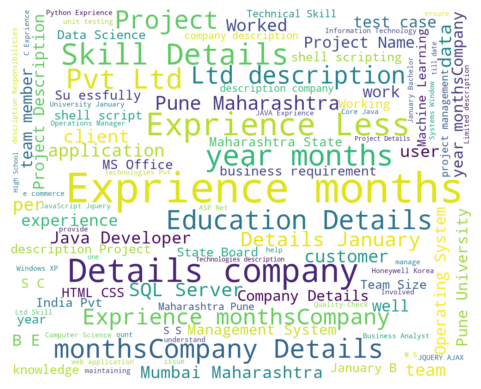

In [50]:
text=' '.join(df_new['Resume'])
wordcloud= WordCloud(background_color='white',
                     width=1000,
                      height=800,
                      max_words=100,
                      colormap='viridis'
                      ).generate(text)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
#Forming corpus
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df_new["Resume"][i]

In [52]:
# Tokenizing cleaned text
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
print("Number of tokens:", len(tokens))

Number of tokens: 411281


In [53]:
words= []
for word in tokens:
    words.append(word.lower())

In [54]:
stopwords= nltk.corpus.stopwords.words('english')
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [55]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ATR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [56]:
# Performing Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download("wordnet")
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

wn = WordNetLemmatizer() 
lem_words = [wn.lemmatize(word) for word in words_new]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ATR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
lem_words[1:10]

['programming',
 'language',
 'python',
 'panda',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib']

In [58]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 291
Number of words not Lemmatized= 1541


In [59]:
freq_dist = nltk.FreqDist(lem_words)

In [60]:
common_words = freq_dist.most_common(30)
words, frequencies = zip(*common_words)

In [61]:
import plotly.express as px
import plotly.graph_objects as go

In [62]:
fig= go.Figure(go.Scatter(
    x=words,
    y=frequencies,
    mode='lines+markers',  # Line plot with markers
    marker=dict(color='rgb(26, 118, 255)')
))

fig.update_layout(
    title='Top 30 Most Common Words in the Resume',
    xaxis_title='Words',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12),
    plot_bgcolor='pink')